# Data understanding
This notebook is made to explore the structure in the data and the relations beyween the variables and understand the context captured in this files.
The goal of this first notebook is to formulate relevant questions to make insights about Github developer survey data and propose some interesting questions based on the questions made.

## Data
The data chosed for this analysis is the AirBnB data for housing prices in the Boston city.
The dataset can be found on [this link](https://www.kaggle.com/airbnb/boston)

In [1]:
! ls data/

survey_results_public.csv  survey_results_schema.csv


In [2]:
# import libraries
from pathlib import Path
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
data_dir = Path('data')
survey_df = pd.read_csv(str(data_dir / 'survey_results_public.csv'))
schema_df = pd.read_csv(str(data_dir / 'survey_results_schema.csv'))

## Utils

In [4]:
def plot_mean_by(df, group_by, mean_column, figsize=(12,7), horizontal=True):
    """groups df by a column, calculate mean of the other column and plots a bar chart.
    
    Args:
        df (pd.DataFrame): pandas dataframe
        group_by (str): columnname  to group dataframe
        mean_column (str): column to calculate meanby groups
        figsize (tuple): tuple (width,height) to show plot
        horizontal (bool): wether plot a horizontal bar or regular bar chart.
    
    Returns:
        None
    """
    tmp = df[[group_by, mean_column]].groupby(group_by).mean()
    tmp = tmp.sort_values(mean_column)
    if horizontal:
        tmp.plot.barh(figsize=figsize);
    else:
        tmp.plot.bar(figsize=figsize);
        

def pieplot_perc_by(df, column, figsize=(12,7)):
    """groups df by a column, calculate mean of the other column and plots a bar chart.
    
    Args:
        df (pd.DataFrame): pandas dataframe
        group_by (str): columnname  to group dataframe
        mean_column (str): column to calculate meanby groups
        figsize (tuple): tuple (width,height) to show plot
        horizontal (bool): wether plot a horizontal bar or regular bar chart.
    
    Returns:
        None
    """
    tmp = df[[group_by, sum_column]].groupby(group_by).count()/df.shape[0]
    tmp = tmp.sort_values(sum_column)
    tmp.plot.pie(figsize=figsize);
        
        
def one_hot_text(df, column, sep=';', prefix=False):
    """ Splits text values form string column data and creates dummies.
    
    Args:
        df (pd.DataFrame): pandas dataframe
        column (str): column name to process
        sep (str): separator of the text in the column
        
    Returns:
        None 
    """
    # extract unique values
    values = set()
    for text in df[column]:
        if type(text) == str:
            for value in text.split(sep):
                values.add(value.strip())
    
    values = list(values)
    dummy_data = []
    for text in df[column]:
        row = np.zeros(len(values))
        if type(text) == str:
            values_data = [value.strip() for value in text.split(sep)]
            for i, val in enumerate(values):
                if val in values_data:
                    row[i] = 1
        dummy_data.append(tuple(row))
    if prefix:
        cols = [column+'_'+val for val in values]
    else:
        cols=values
    dummies_df = pd.DataFrame(dummy_data, index=df.index, columns=cols)
    
    return dummies_df

## Structure of the data

### Survey

Contains information about developers using github and the answers to a list of questions made in the survey.

In [5]:
survey_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


### Schema
This dataset is a data dictionary containing the descriptions of the columns in `survey_df` dataset.

In [7]:
schema_df.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


## Data Exploration

Looking at the data in the schemma I think that the column `JobSatisfaction` may be interesting since we can see which characteristics make a developer feel satisfaction for its job.

First we are going to separate people which current `EmploymentStatus` is Employed full-time or Employed part-time, which may be the developers who work in a company.

In [8]:
df = survey_df[(survey_df.EmploymentStatus == "Employed full-time") 
               | (survey_df.EmploymentStatus == "Employed part-time")]

We also retire missing values from `Salary` column since we are interested in the payments as part of job satisfaction.

In [9]:
df = df.dropna(subset=["Salary"])

Lets see first the general satisfaction among developers.

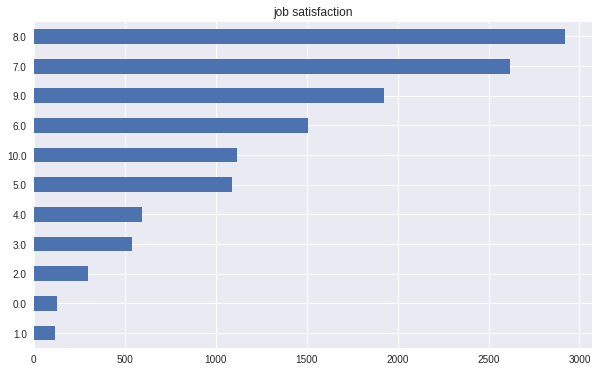

In [10]:
interest_var = "JobSatisfaction"
df[interest_var].value_counts().sort_values().plot.barh(title="job satisfaction", figsize=(10,6));

In general we can see there is a good rate of job satisfaction, lets see what aspects of a job  makes a developer feel satisfied wth his job. The columns we are going to analyse further in this notebook are those which I think a job can offer.

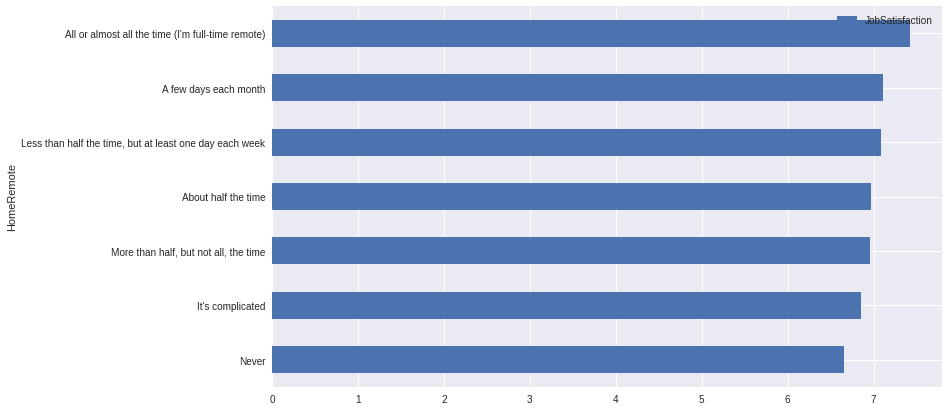

In [11]:
plot_mean_by(df, "HomeRemote", interest_var)

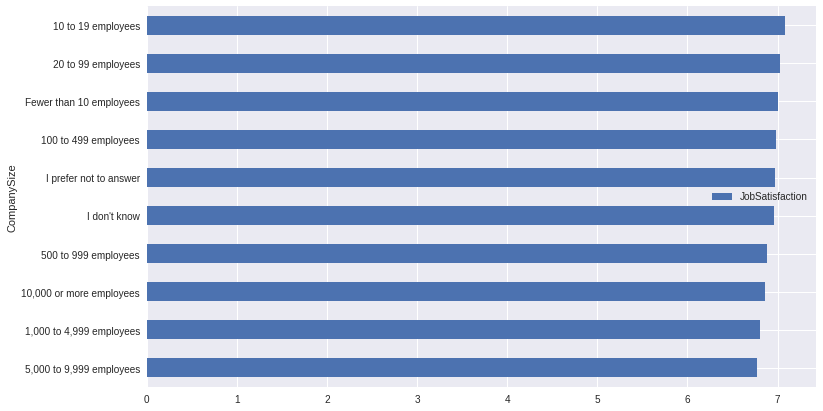

In [12]:
plot_mean_by(df, "CompanySize", interest_var)

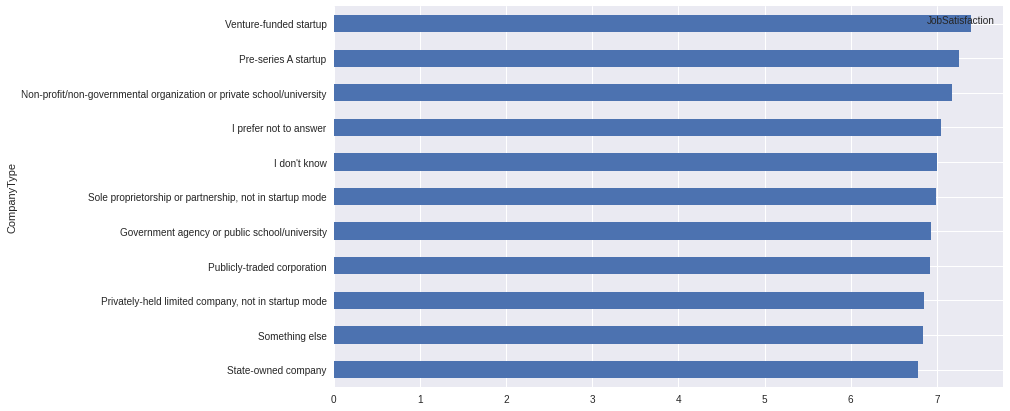

In [13]:
plot_mean_by(df, "CompanyType", interest_var)

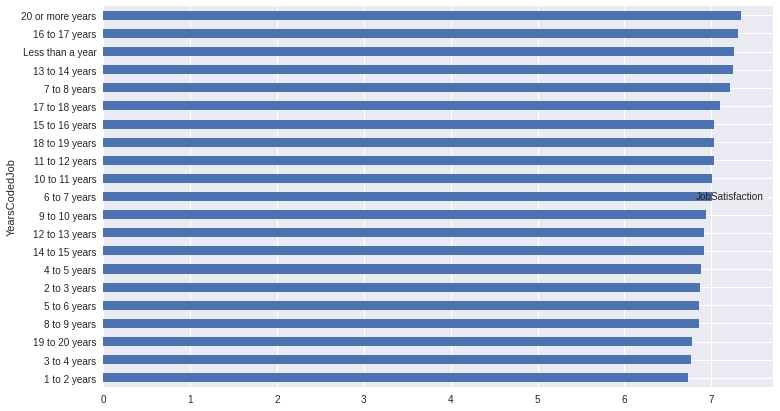

In [14]:
plot_mean_by(df, "YearsCodedJob", interest_var)

In [15]:
languages_df = one_hot_text(df, "HaveWorkedLanguage").sum()

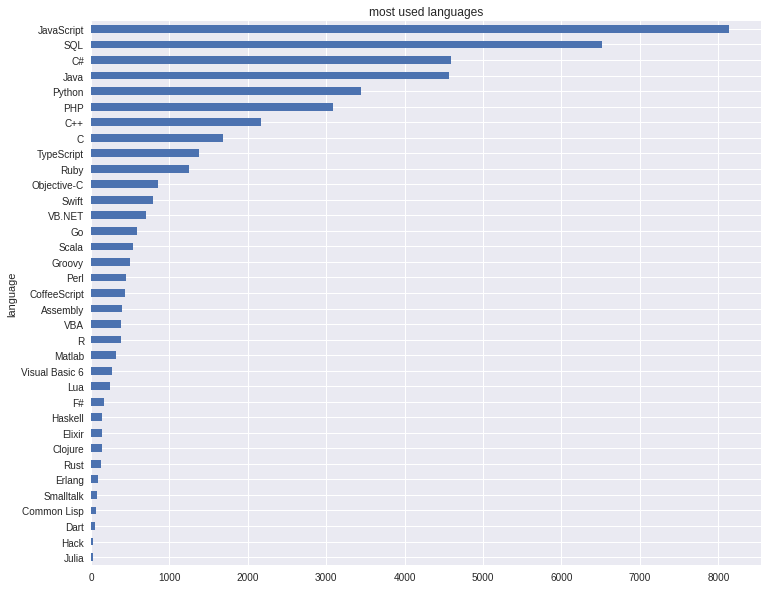

In [16]:
languages_df.sort_values().plot.barh(title="most used languages", 
                                     xlabel="language",
                                     figsize=(12,10));

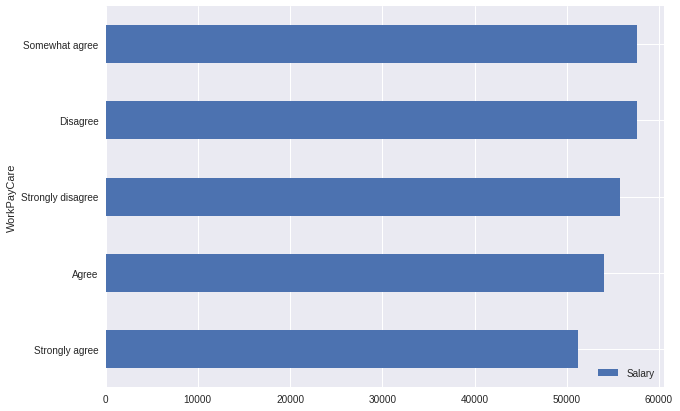

In [17]:
plot_mean_by(df, "WorkPayCare", "Salary", figsize=(10, 7))

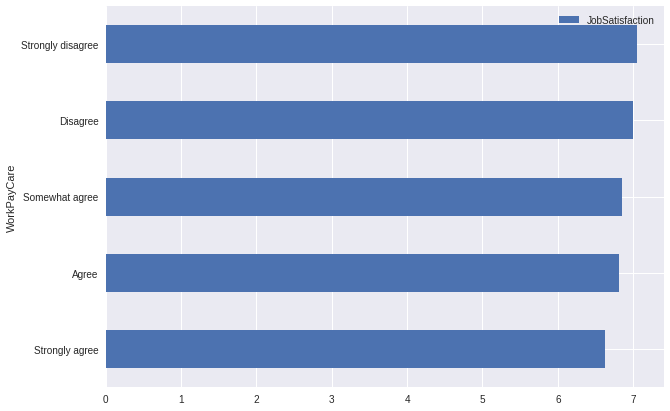

In [18]:
plot_mean_by(df, "WorkPayCare", interest_var, figsize=(10, 7))

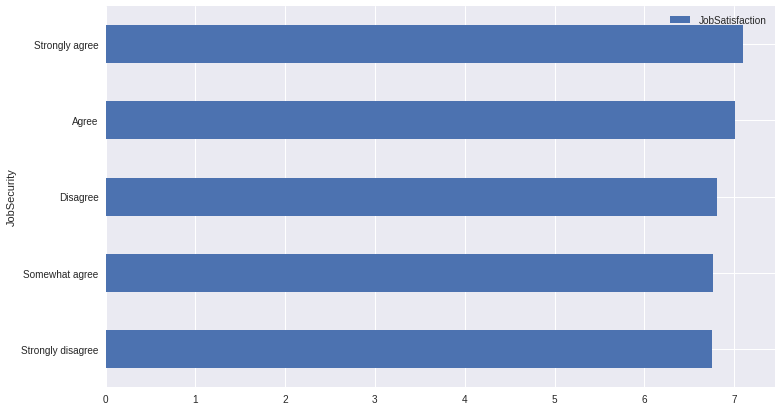

In [19]:
plot_mean_by(df, "JobSecurity", interest_var)

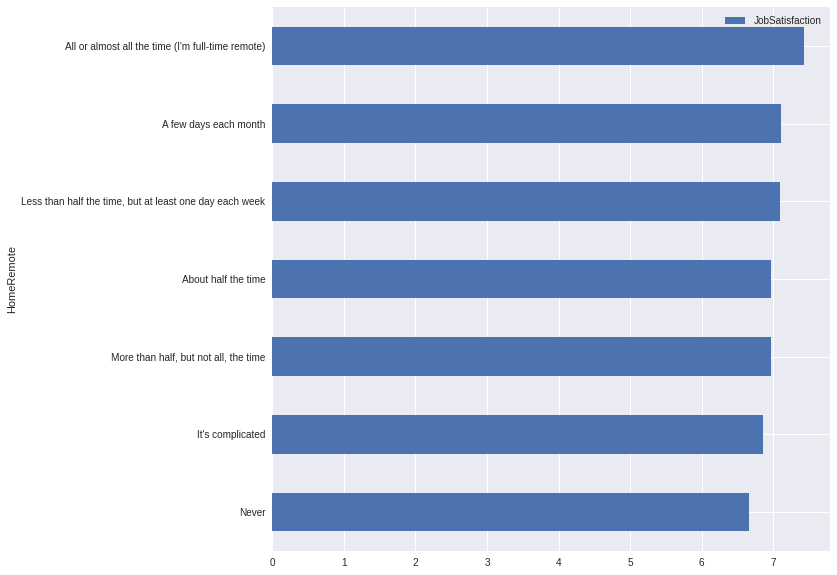

In [20]:
plot_mean_by(df, "HomeRemote", interest_var, figsize=(10,10))

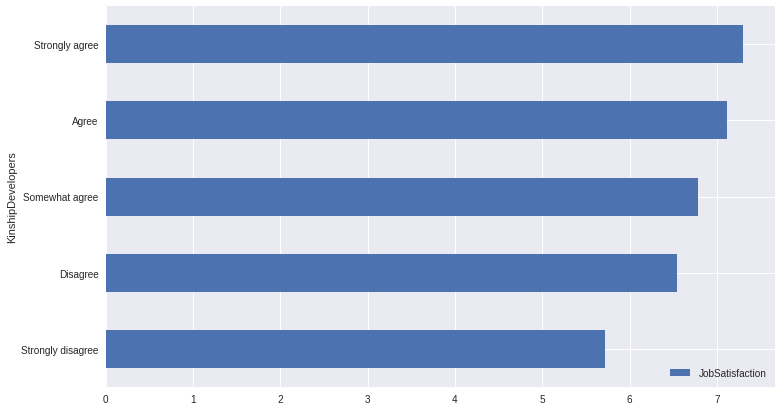

In [21]:
plot_mean_by(df, "KinshipDevelopers", interest_var)

In [22]:
benefits_df = one_hot_text(df, "ImportantBenefits").sum()

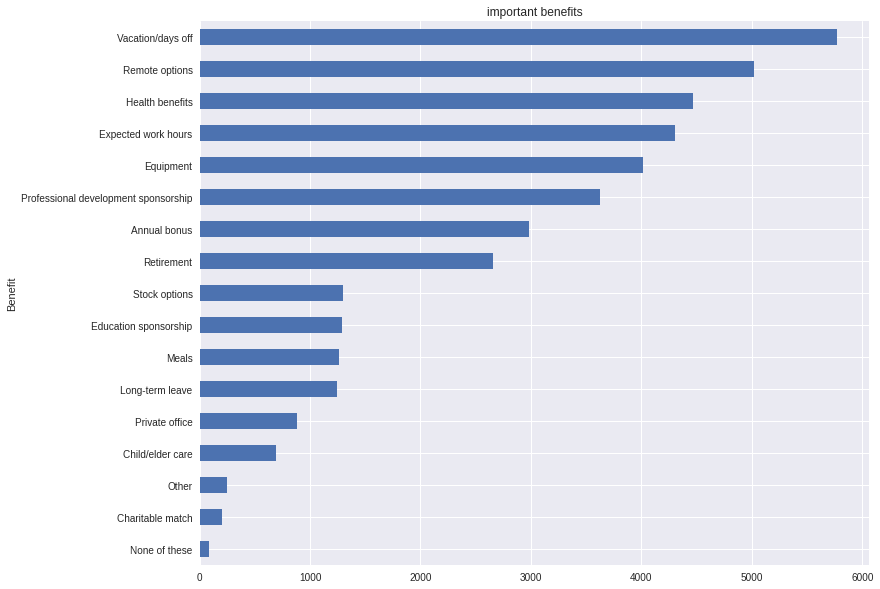

In [23]:
benefits_df.sort_values().plot.barh(title="important benefits"
                                    , xlabel="Benefit"
                                    , ylabel="Mentions"
                                    , figsize=(12,10));

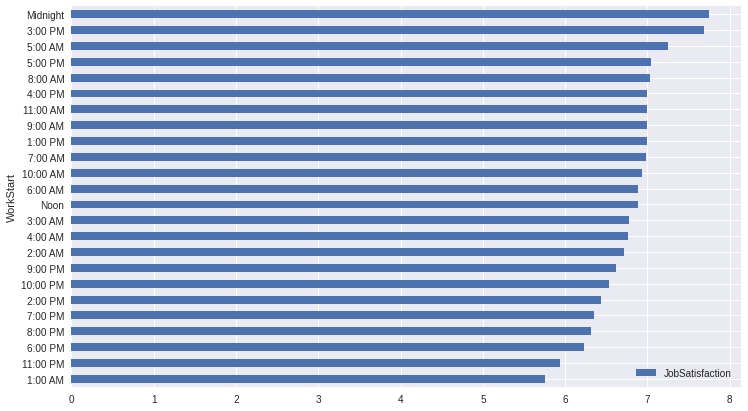

In [24]:
plot_mean_by(df, "WorkStart", interest_var)

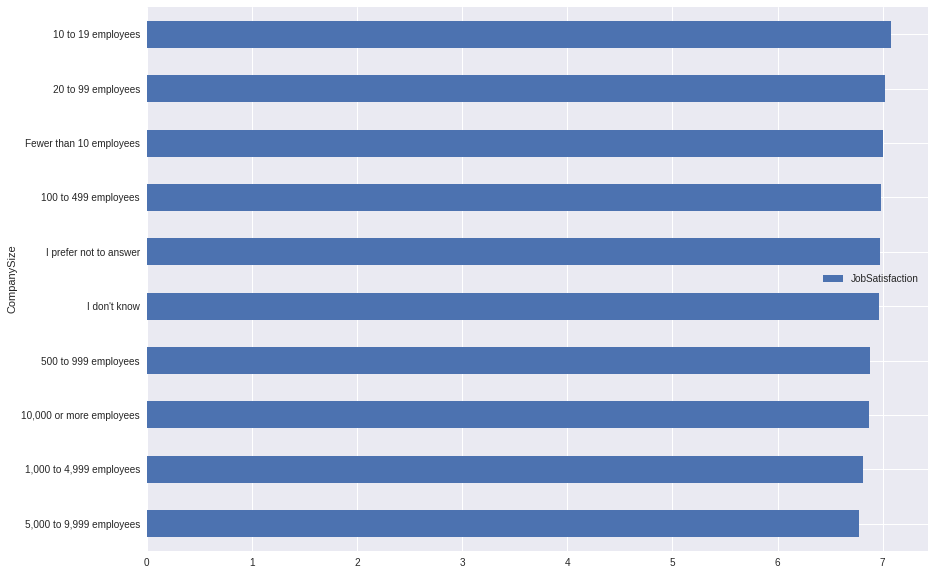

In [25]:
plot_mean_by(df, "CompanySize", interest_var, figsize=(14,10))

In [26]:
df["SalaryInterval"] = pd.cut(df["Salary"], bins=10)

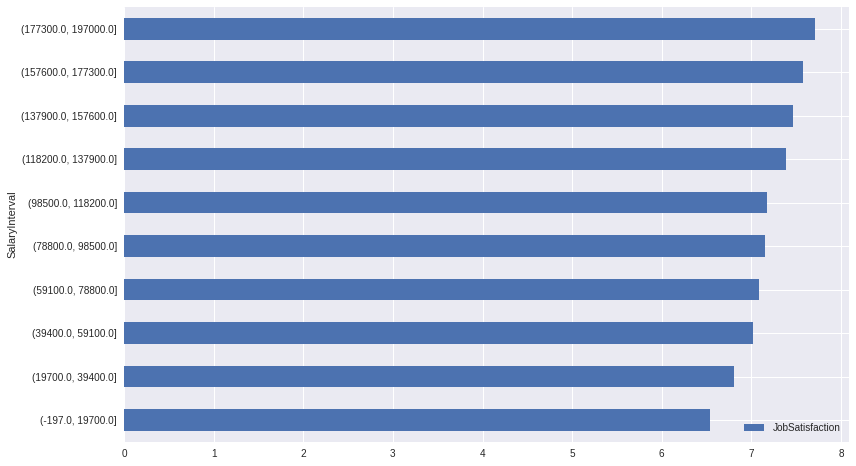

In [27]:
plot_mean_by(df, "SalaryInterval", interest_var, (13,8))

In [28]:
df[["SalaryInterval","ExCoderReturn","JobSatisfaction"]].groupby(["SalaryInterval","ExCoderReturn"]).mean()

,,JobSatisfaction
SalaryInterval,ExCoderReturn,
"(-197.0, 19700.0]",Strongly disagree,NaN
"(19700.0, 39400.0]",Strongly disagree,4.0
"(39400.0, 59100.0]",Strongly disagree,NaN
"(59100.0, 78800.0]",Strongly disagree,NaN
"(78800.0, 98500.0]",Strongly disagree,NaN
"(98500.0, 118200.0]",Strongly disagree,NaN
"(118200.0, 137900.0]",Strongly disagree,NaN
"(137900.0, 157600.0]",Strongly disagree,NaN
"(157600.0, 177300.0]",Strongly disagree,NaN


## Modeling
Next a model is going to be created to put job satisfaction in function of `HomeRemote`, `ImportantBenefits`, `CompanyType`, `CompanySize`, `Salary` and `JobSatisfaction` features.

### Feature enginnering

In [29]:
df = df[["HomeRemote", "ImportantBenefits", "CompanyType", "CompanySize", "Salary", "JobSatisfaction"]]

In [30]:
# remove totally missing rows and columns
df = df.dropna(how='all', axis=1)
df = df.dropna(how='all', axis=0)

In [31]:
# remove rows where Job Satisfaction is missing
df = df.dropna(subset=["JobSatisfaction"])

In [32]:
df.count()

HomeRemote           12845
ImportantBenefits     8954
CompanyType          12831
CompanySize          12843
Salary               12852
JobSatisfaction      12852
dtype: int64

For simplicity rows of benefits with no values are droped too.

In [33]:
df = df.dropna(subset=["ImportantBenefits"])

In [34]:
df.count()

HomeRemote           8950
ImportantBenefits    8954
CompanyType          8938
CompanySize          8947
Salary               8954
JobSatisfaction      8954
dtype: int64

rest of the missing values are filled, they are not too many, therefore it wouldn add too much noise.

In [35]:
categorical_cols = df.select_dtypes("object").columns
for column in categorical_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [36]:
df.count()

HomeRemote           8954
ImportantBenefits    8954
CompanyType          8954
CompanySize          8954
Salary               8954
JobSatisfaction      8954
dtype: int64

In [38]:
# one hot encoding for benefits
benefits_dummies = one_hot_text(df, "ImportantBenefits", prefix=True)
df = df.drop("ImportantBenefits", axis=1).join(benefits_dummies)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8954 entries, 17 to 51390
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   HomeRemote                                              8954 non-null   object 
 1   CompanyType                                             8954 non-null   object 
 2   CompanySize                                             8954 non-null   object 
 3   Salary                                                  8954 non-null   float64
 4   JobSatisfaction                                         8954 non-null   float64
 5   ImportantBenefits_Expected work hours                   8954 non-null   float64
 6   ImportantBenefits_Education sponsorship                 8954 non-null   float64
 7   ImportantBenefits_Vacation/days off                     8954 non-null   float64
 8   ImportantBenefits_Remote options    

Lastly lets convert the remaining categorical columns to dummies

In [48]:
df = df.join(pd.get_dummies(df[categorical_cols], prefix=categorical_cols))
df = df.drop(categorical_cols, axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8954 entries, 17 to 51390
Data columns (total 47 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Salary                                                                             8954 non-null   float64
 1   JobSatisfaction                                                                    8954 non-null   float64
 2   ImportantBenefits_Expected work hours                                              8954 non-null   float64
 3   ImportantBenefits_Education sponsorship                                            8954 non-null   float64
 4   ImportantBenefits_Vacation/days off                                                8954 non-null   float64
 5   ImportantBenefits_Remote options                                                   8954 non-null   flo

### Model Training

In [88]:
from sklearn.model_selection import train_test_split

y = df["JobSatisfaction"]
X = df.drop("JobSatisfaction", axis=1)

X = X / X.max()
y = y / y.max()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [93]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neural_network import MLPRegressor



model = Ridge()
model.fit(X_train, y_train)

print(f"r2 score on trained model is {model.score(X_train, y_train)}")

r2 score on trained model is 0.038340021356272236


### Model Evaluation

In [94]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
print(f"r2 score on trained model is {r2_score(y_pred, y_test)}")

r2 score on trained model is -24.33589548712092


This model overfitted. Altough we can check the model's coefficients to see how each variable was rated.

In [95]:

def coef_weights(lm_model, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(model, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
0,Salary,0.117544,0.117544
17,ImportantBenefits_Private office,-0.044657,0.044657
24,HomeRemote_Never,-0.031761,0.031761
21,HomeRemote_It's complicated,-0.030392,0.030392
13,ImportantBenefits_None of these,0.028845,0.028845
29,CompanyType_Pre-series A startup,0.025939,0.025939
20,HomeRemote_All or almost all the time (I'm ful...,0.023448,0.023448
33,CompanyType_Something else,-0.023321,0.023321
4,ImportantBenefits_Remote options,-0.019657,0.019657
2,ImportantBenefits_Education sponsorship,-0.019051,0.019051


We can conclude from this coefficientes that the variable with the most importance is Salary, and with negative values are not having remote options and not having a private office.